In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\OnlineRetail.csv", encoding = 'unicode_escape')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# kiểm tra dữ liệu không bị khuyết thiếu

In [6]:
df.notna().sum()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

# in ra các dòng dữ liệu ngoại lai ở cột quantity < 0

In [7]:
df_quantity = df[df['Quantity'] < 0]

In [8]:
df_quantity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10624 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10624 non-null  object 
 1   StockCode    10624 non-null  object 
 2   Description  9762 non-null   object 
 3   Quantity     10624 non-null  int64  
 4   InvoiceDate  10624 non-null  object 
 5   UnitPrice    10624 non-null  float64
 6   CustomerID   8905 non-null   float64
 7   Country      10624 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 747.0+ KB


In [9]:
df_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [18]:
df[df['CustomerID'].isna() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


# xóa dữ liệu bị thiếu khuyết

In [36]:
df2 = df.dropna(how='all')

In [37]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [38]:
df2.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [39]:
# xóa những hàng có customsID bị thiếu khuyết
df2.dropna(subset = ['CustomerID'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [40]:
df2.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

+ xem dữ liệu ngoại lai

<AxesSubplot:xlabel='Quantity'>

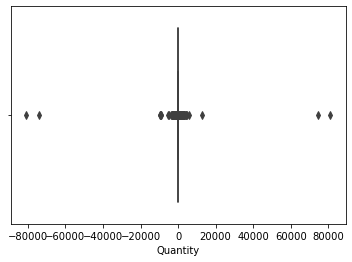

In [42]:
sns.boxplot(x = df['Quantity'])

In [44]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

In [45]:
IQR = Q3 - Q1

In [57]:
# xác định phần tử ngoại lai
df3 = df
df3['outlier'] = ~((df['Quantity'] < (Q1 -1.5*IQR)) | (df['Quantity'] > (Q3 +1.5*IQR)) )

In [58]:
df3 = df3[df3['outlier'] == True]

In [59]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,outlier
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,True
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True


<AxesSubplot:xlabel='Quantity'>

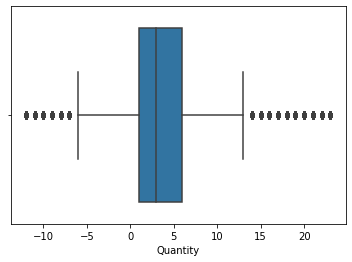

In [60]:
sns.boxplot(x = df3['Quantity'])

# xử lí cột Quantity

In [61]:
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [62]:
# chuẩn hóa với minmaxscaler
scaler = MinMaxScaler()

In [64]:
# chuẩn hóa với scaler
df_s = scaler.fit_transform(df[['Quantity']])

In [65]:
pd.DataFrame(df_s).describe()

,0
count,541909.000000
mean,0.500059
std,0.001346
min,0.000000
25%,0.500006
50%,0.500019
75%,0.500062
max,1.000000


<AxesSubplot:>

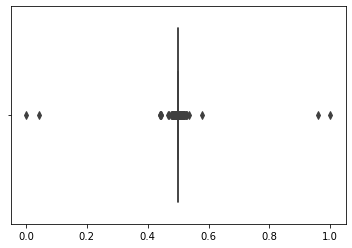

In [66]:
# vẽ biểu đồ hộp
sns.boxplot(x = df_s)

# chuẩn hóa với dữ liệu z-score scalling

In [67]:
scaler = StandardScaler()

In [68]:
df_s = scaler.fit_transform(df[['Quantity']])

In [69]:
pd.DataFrame(df_s).describe()

,0
count,5.419090e+05
mean,-6.984371e-15
std,1.000001e+00
min,-3.714426e+02
25%,-3.921594e-02
50%,-3.004503e-02
75%,2.053139e-03
max,3.713550e+02


<AxesSubplot:>

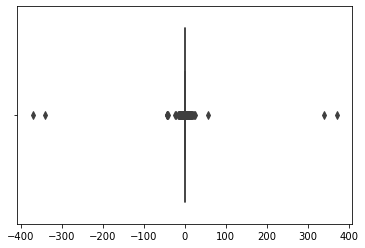

In [70]:
sns.boxplot(x = df_s)

# chuẩn hóa One-hot encoder

In [71]:
scaler = OneHotEncoder()

In [72]:
df_s = scaler.fit_transform(np.asarray(df[['Country']]).reshape(-1,1))
df_s.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
pd.get_dummies(df['Country'])

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# mã hóa cột Country với Label encoder sử dụng scikit learn
df_s = LabelEncoder()

df_s = encoder.fit_transform(np.asarray(df['Country']))
df_s

array([36, 36, 36, ..., 13, 13, 13])

In [76]:
df['Country'].astype('category').cat.codes

0         36
1         36
2         36
3         36
4         36
          ..
541904    13
541905    13
541906    13
541907    13
541908    13
Length: 541909, dtype: int8

In [77]:
cats = pd.cut(df['UnitPrice'], 4)
cats

0         (-11112.092, 1445.955]
1         (-11112.092, 1445.955]
2         (-11112.092, 1445.955]
3         (-11112.092, 1445.955]
4         (-11112.092, 1445.955]
                   ...          
541904    (-11112.092, 1445.955]
541905    (-11112.092, 1445.955]
541906    (-11112.092, 1445.955]
541907    (-11112.092, 1445.955]
541908    (-11112.092, 1445.955]
Name: UnitPrice, Length: 541909, dtype: category
Categories (4, interval[float64, right]): [(-11112.092, 1445.955] < (1445.955, 13953.97] < (13953.97, 26461.985] < (26461.985, 38970.0]]

In [78]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(-11112.092, 1445.955]    541822
(1445.955, 13953.97]          83
(13953.97, 26461.985]          3
(26461.985, 38970.0]           1
Name: UnitPrice, dtype: int64

In [80]:
# chia thành 4 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df['UnitPrice'], 4)
cats

0               (2.08, 4.13]
1               (2.08, 4.13]
2               (2.08, 4.13]
3               (2.08, 4.13]
4               (2.08, 4.13]
                 ...        
541904    (-11062.061, 1.25]
541905          (2.08, 4.13]
541906       (4.13, 38970.0]
541907       (4.13, 38970.0]
541908       (4.13, 38970.0]
Name: UnitPrice, Length: 541909, dtype: category
Categories (4, interval[float64, right]): [(-11062.061, 1.25] < (1.25, 2.08] < (2.08, 4.13] < (4.13, 38970.0]]

In [81]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(-11062.061, 1.25]    167385
(2.08, 4.13]          140503
(4.13, 38970.0]       128915
(1.25, 2.08]          105106
Name: UnitPrice, dtype: int64